In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [15]:
# Read in file with prevalence and phecodes
data = pd.read_csv('phecode_prevalence.tsv', sep='\t', header=0)

# Look at dataframe
data

,Disease Phecodes,Prevalence (%)
0,p008,1.654157
1,p008.5,1.126154
2,p008.52,0.331490
3,p008.6,0.383910
4,p008.7,0.023804
...,...,...
782,p988,0.043557
783,p989,0.007597
784,p990,2.524792
785,p994,2.740552


In [16]:
# Read in file with phecodes and respective disease names
disease_phecodes = pd.read_csv('phecodes_cols.txt', sep='\t', header=None, names=['Phecode', 'Disease + Phecode'])

In [17]:
# Look at dataframe
disease_phecodes

,Phecode,Disease + Phecode
0,p008,Intestinal infection|p008
1,p008.5,Bacterial enteritis|p008.5
2,p008.51,Intestinal e.coli|p008.51
3,p008.52,Intestinal infection due to C. difficile|p008.52
4,p008.6,Viral Enteritis|p008.6
...,...,...
1212,p990,Effects radiation NOS|p990
1213,p994,Sepsis and SIRS|p994
1214,p994.1,Systemic inflammatory response syndrome (SIRS)...
1215,p994.2,Sepsis|p994.2


In [18]:
# Split add a column with just disease rather than the disease and phecode 
disease_phecodes['Disease'] = disease_phecodes['Disease + Phecode'].str.split('|').str[0]

# Remove the column with disease and phecodes 
disease_phecodes.drop(labels='Disease + Phecode', axis=1, inplace=True)

In [19]:
#Look at dataframe
disease_phecodes

,Phecode,Disease
0,p008,Intestinal infection
1,p008.5,Bacterial enteritis
2,p008.51,Intestinal e.coli
3,p008.52,Intestinal infection due to C. difficile
4,p008.6,Viral Enteritis
...,...,...
1212,p990,Effects radiation NOS
1213,p994,Sepsis and SIRS
1214,p994.1,Systemic inflammatory response syndrome (SIRS)
1215,p994.2,Sepsis


In [20]:
# Create dictionary of diseases and phecodes 

# Make phecodes index 
df=disease_phecodes.set_index('Phecode')

#Create dictionary
dic = df.to_dict(orient='index')

# Remove disease part from this dictionary - leaving dictionary as p008:'Intestinal Infection'
dic2={}

for key in dic:
    
    dic2[key]=dic[key]['Disease']

In [21]:
# Replce phecodes values in data with disease names
prev_data= data.replace({'Disease Phecodes':dic2})

# Rename the column
prev_data.rename(columns = {'Disease Phecodes':'Disease'}, inplace = True)

# Write pre_data to file
prev_data.to_csv('disease_prevalence.tsv', sep="\t")

# Look at dataframe
prev_data

,Disease,Prevalence (%)
0,Intestinal infection,1.654157
1,Bacterial enteritis,1.126154
2,Intestinal infection due to C. difficile,0.331490
3,Viral Enteritis,0.383910
4,Intestinal infection due to protozoa,0.023804
...,...,...
782,Toxic effect of noxious substances eaten as food,0.043557
783,Toxic effect of other substances chiefly nonme...,0.007597
784,Effects radiation NOS,2.524792
785,Sepsis and SIRS,2.740552


https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

In [22]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10, 6]
# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

<AxesSubplot:xlabel='Disease', ylabel='Prevalence (%)'>

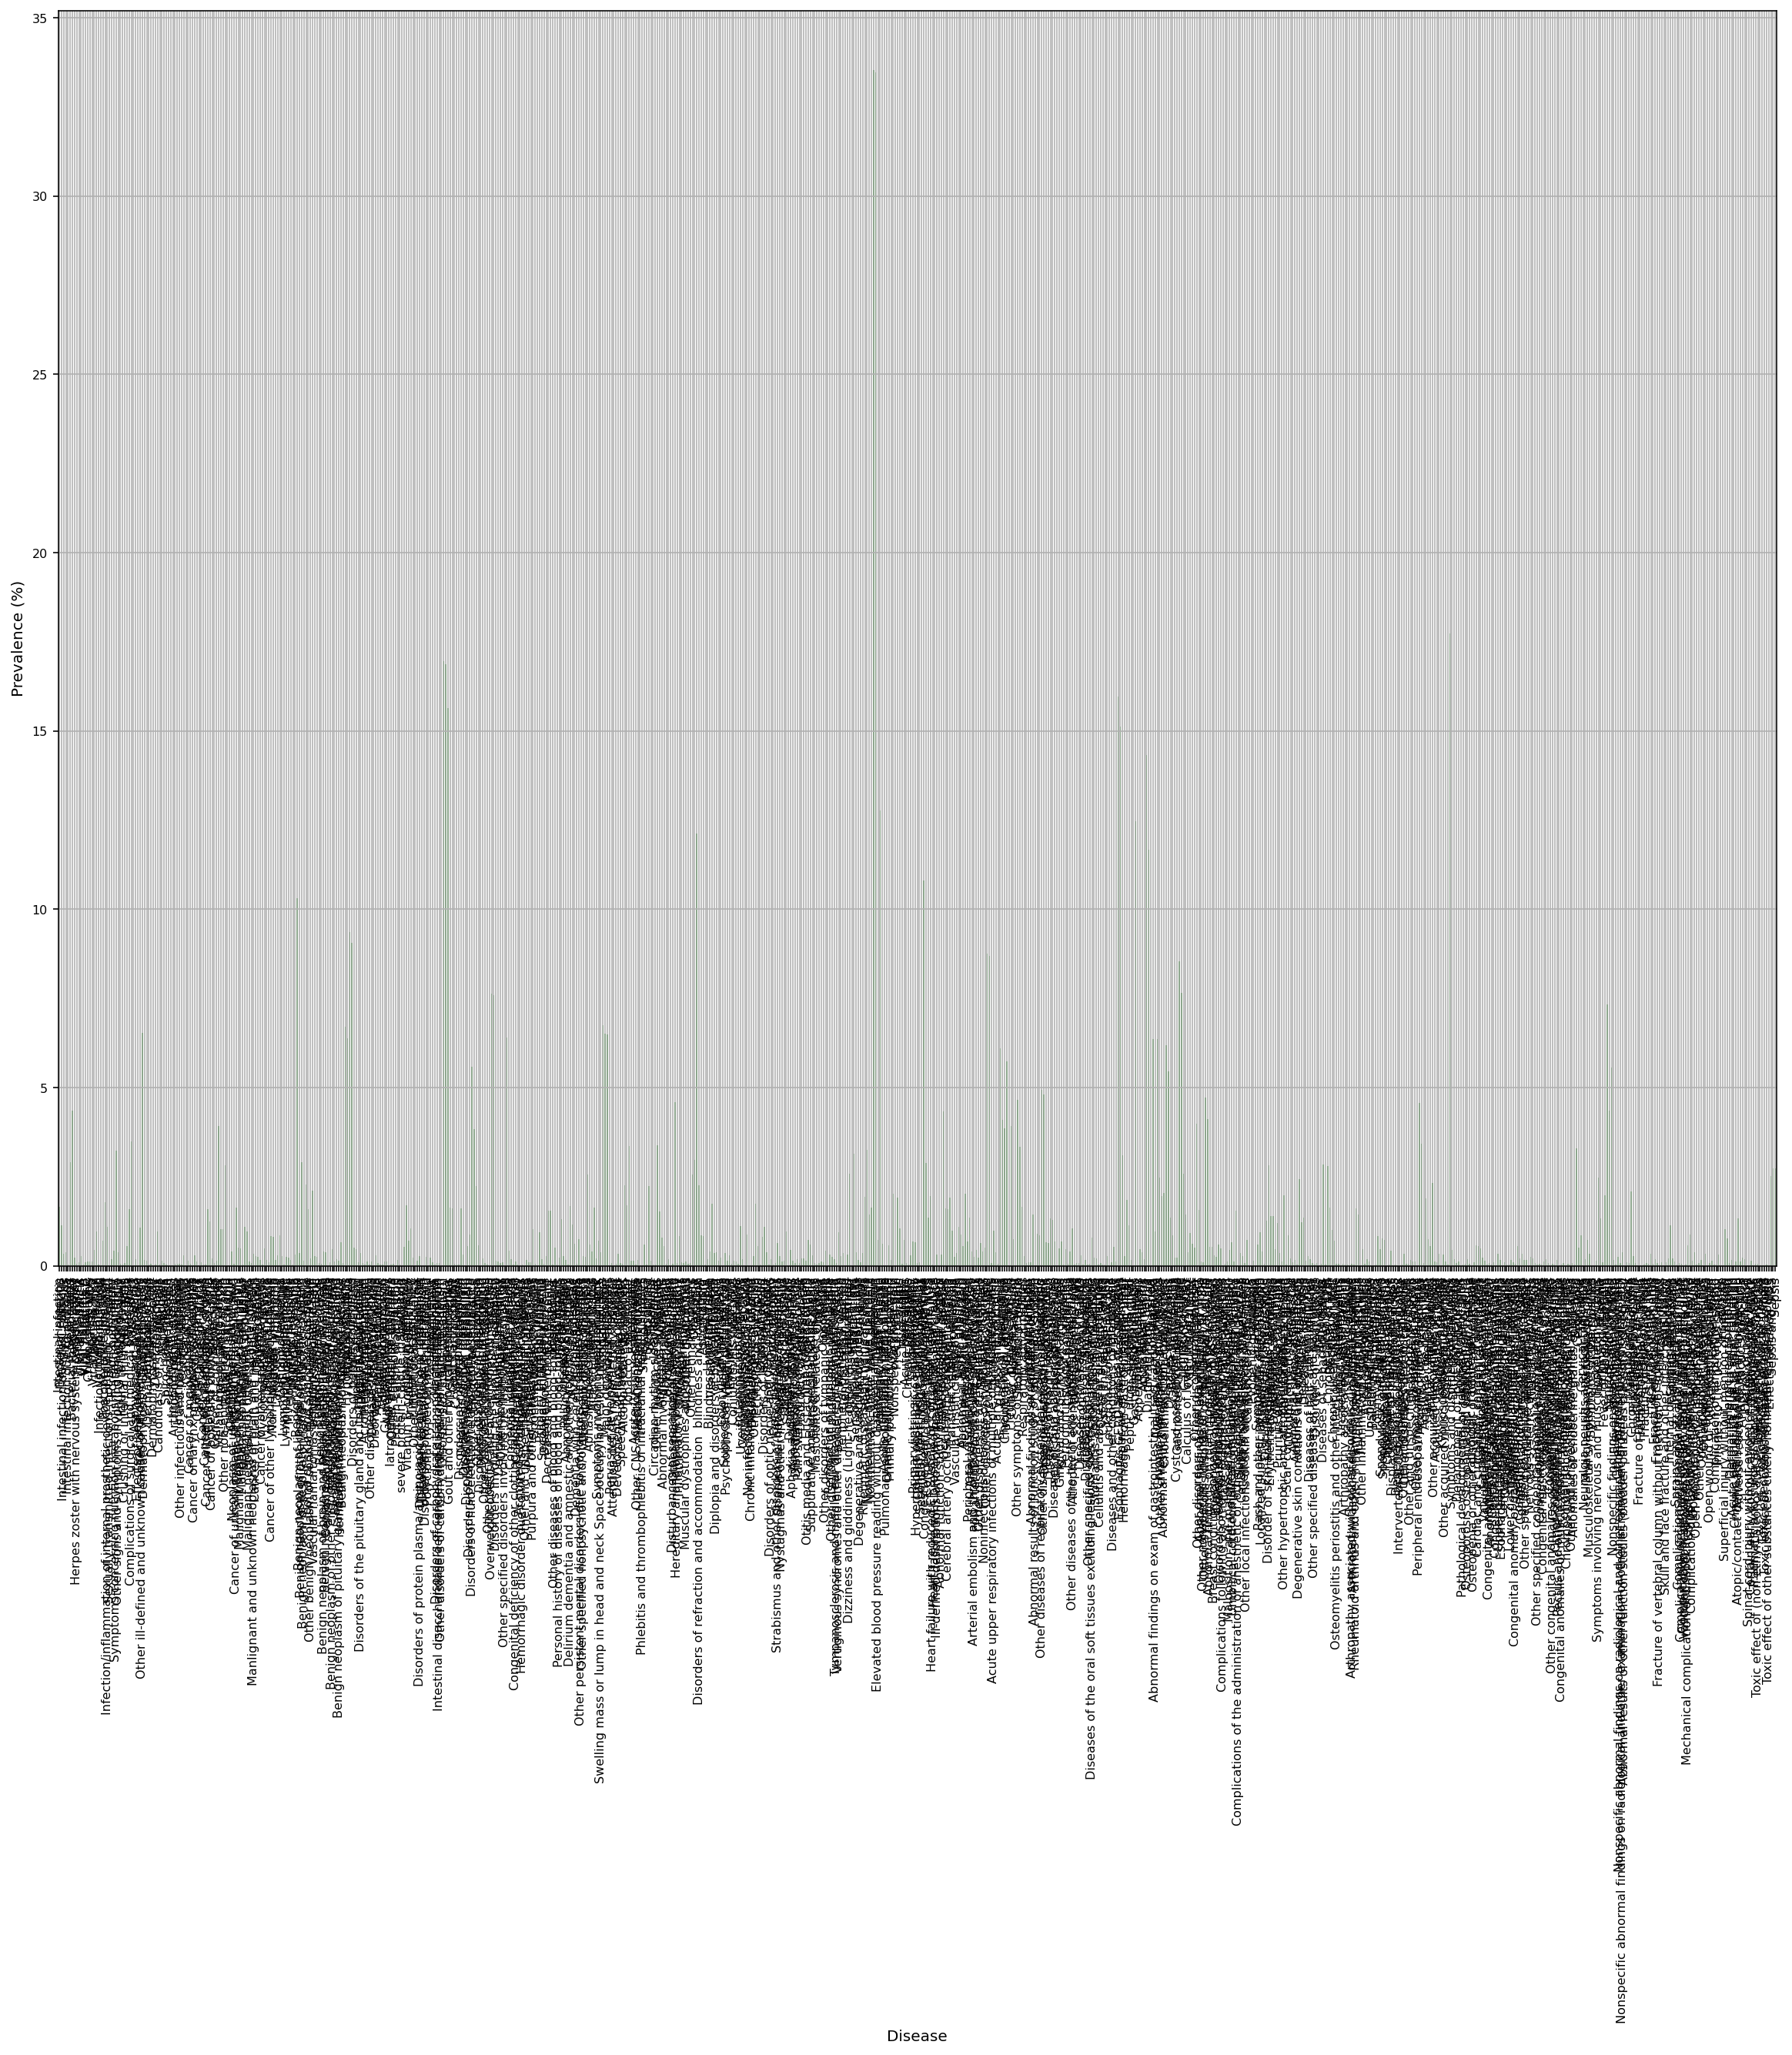

In [23]:
# Create bar chart of all diseases
ax__ = prev_data.plot.bar(x='Disease',
                          ylabel='Prevalence (%)',
                          rot=90,
                          fontsize=8,
                          figsize=(20, 15),
                          grid=True,
                          legend=False,
                          color='g')

ax__
# Unreadable so data will need to be split into chunks

In [103]:
# Too many diseases for one barplot
# Split dataframe into 10 

split = np.array_split(prev_data, 10)

data0_78 = pd.DataFrame(split[0])

data79_157 = pd.DataFrame(split[1])

data158_236 = pd.DataFrame(split[2])

data237_315 = pd.DataFrame(split[3])

data316_394 = pd.DataFrame(split[4])

data395_473 = pd.DataFrame(split[5])

data474_552 = pd.DataFrame(split[6])

data553_630 = pd.DataFrame(split[7])

data631_708 = pd.DataFrame(split[8])

data709_786 = pd.DataFrame(split[9])


In [32]:
# Look at one of the 10 dataframes
data316_394

,Disease,Prevalence (%)
316,Noninfectious dermatoses of eyelid,0.006584
317,Chronic inflammatory disorders of orbit,0.005824
318,Disorders of conjunctiva,0.270206
319,Other disorders of eyelids,1.733927
320,Ectropion or entropion,0.546996
...,...,...
390,Endocarditis,0.291984
391,Cardiomyopathy,0.687037
392,Primary/intrinsic cardiomyopathies,0.669057
393,Hypertrophic obstructive cardiomyopathy,0.072680


In [88]:
# Write function for makeing barplots from our dataframes
def prev_barplot(dataframe, bar_col):
    
    plt.rcParams["figure.figsize"] = [25, 20]
    ax = dataframe.plot.barh(x='Disease',
                    y='Prevalence (%)',
                    rot=0,
                    fontsize=12,
                    grid=True,
                    legend=True,
                    color=bar_col,
                    )
    
    fig = ax.get_figure()
    
    return fig

# Function for saving barplots 
def save_barplot(plot, title):
    
    plot.savefig((title+'.jpeg'), dpi=300, bbox_inches='tight')
    

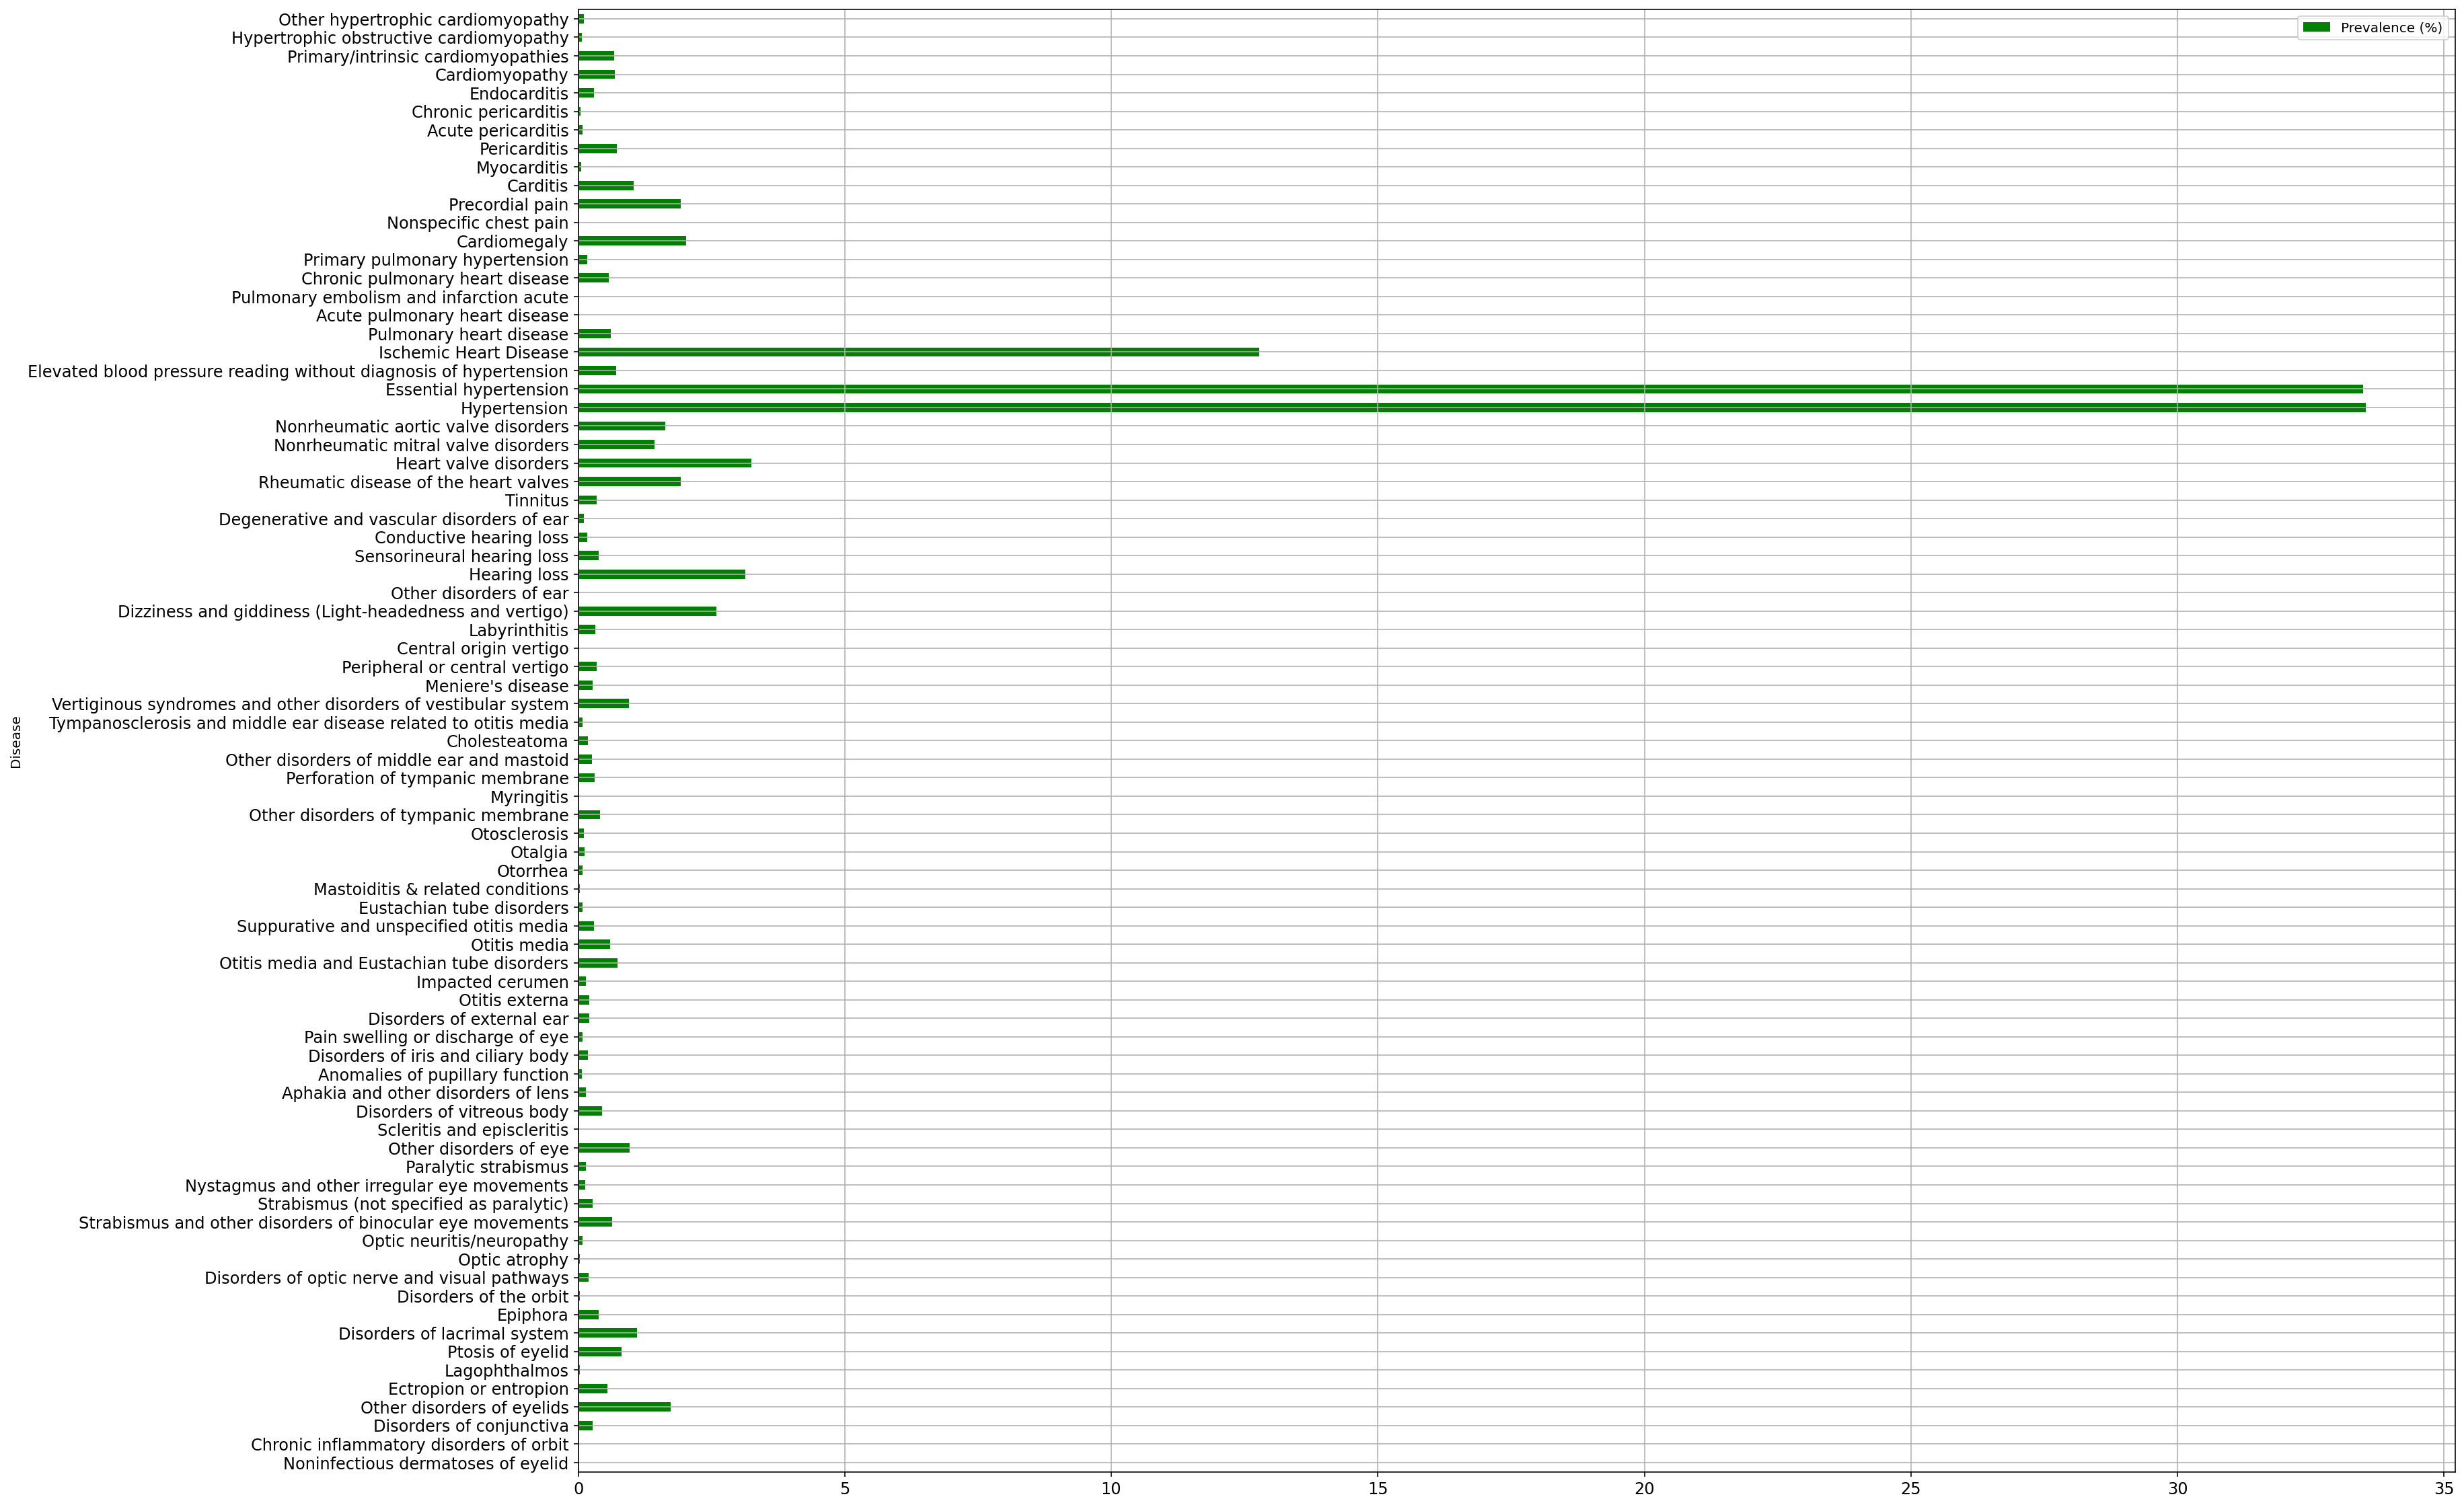

In [89]:
b4 = prev_barplot(data316_394, 'g')

save_barplot(b4, 'prev_bar_316_394')

FileNotFoundError: [Errno 2] No such file or directory: 'prevalence_barplots/prev_bar_0_78.jpeg'

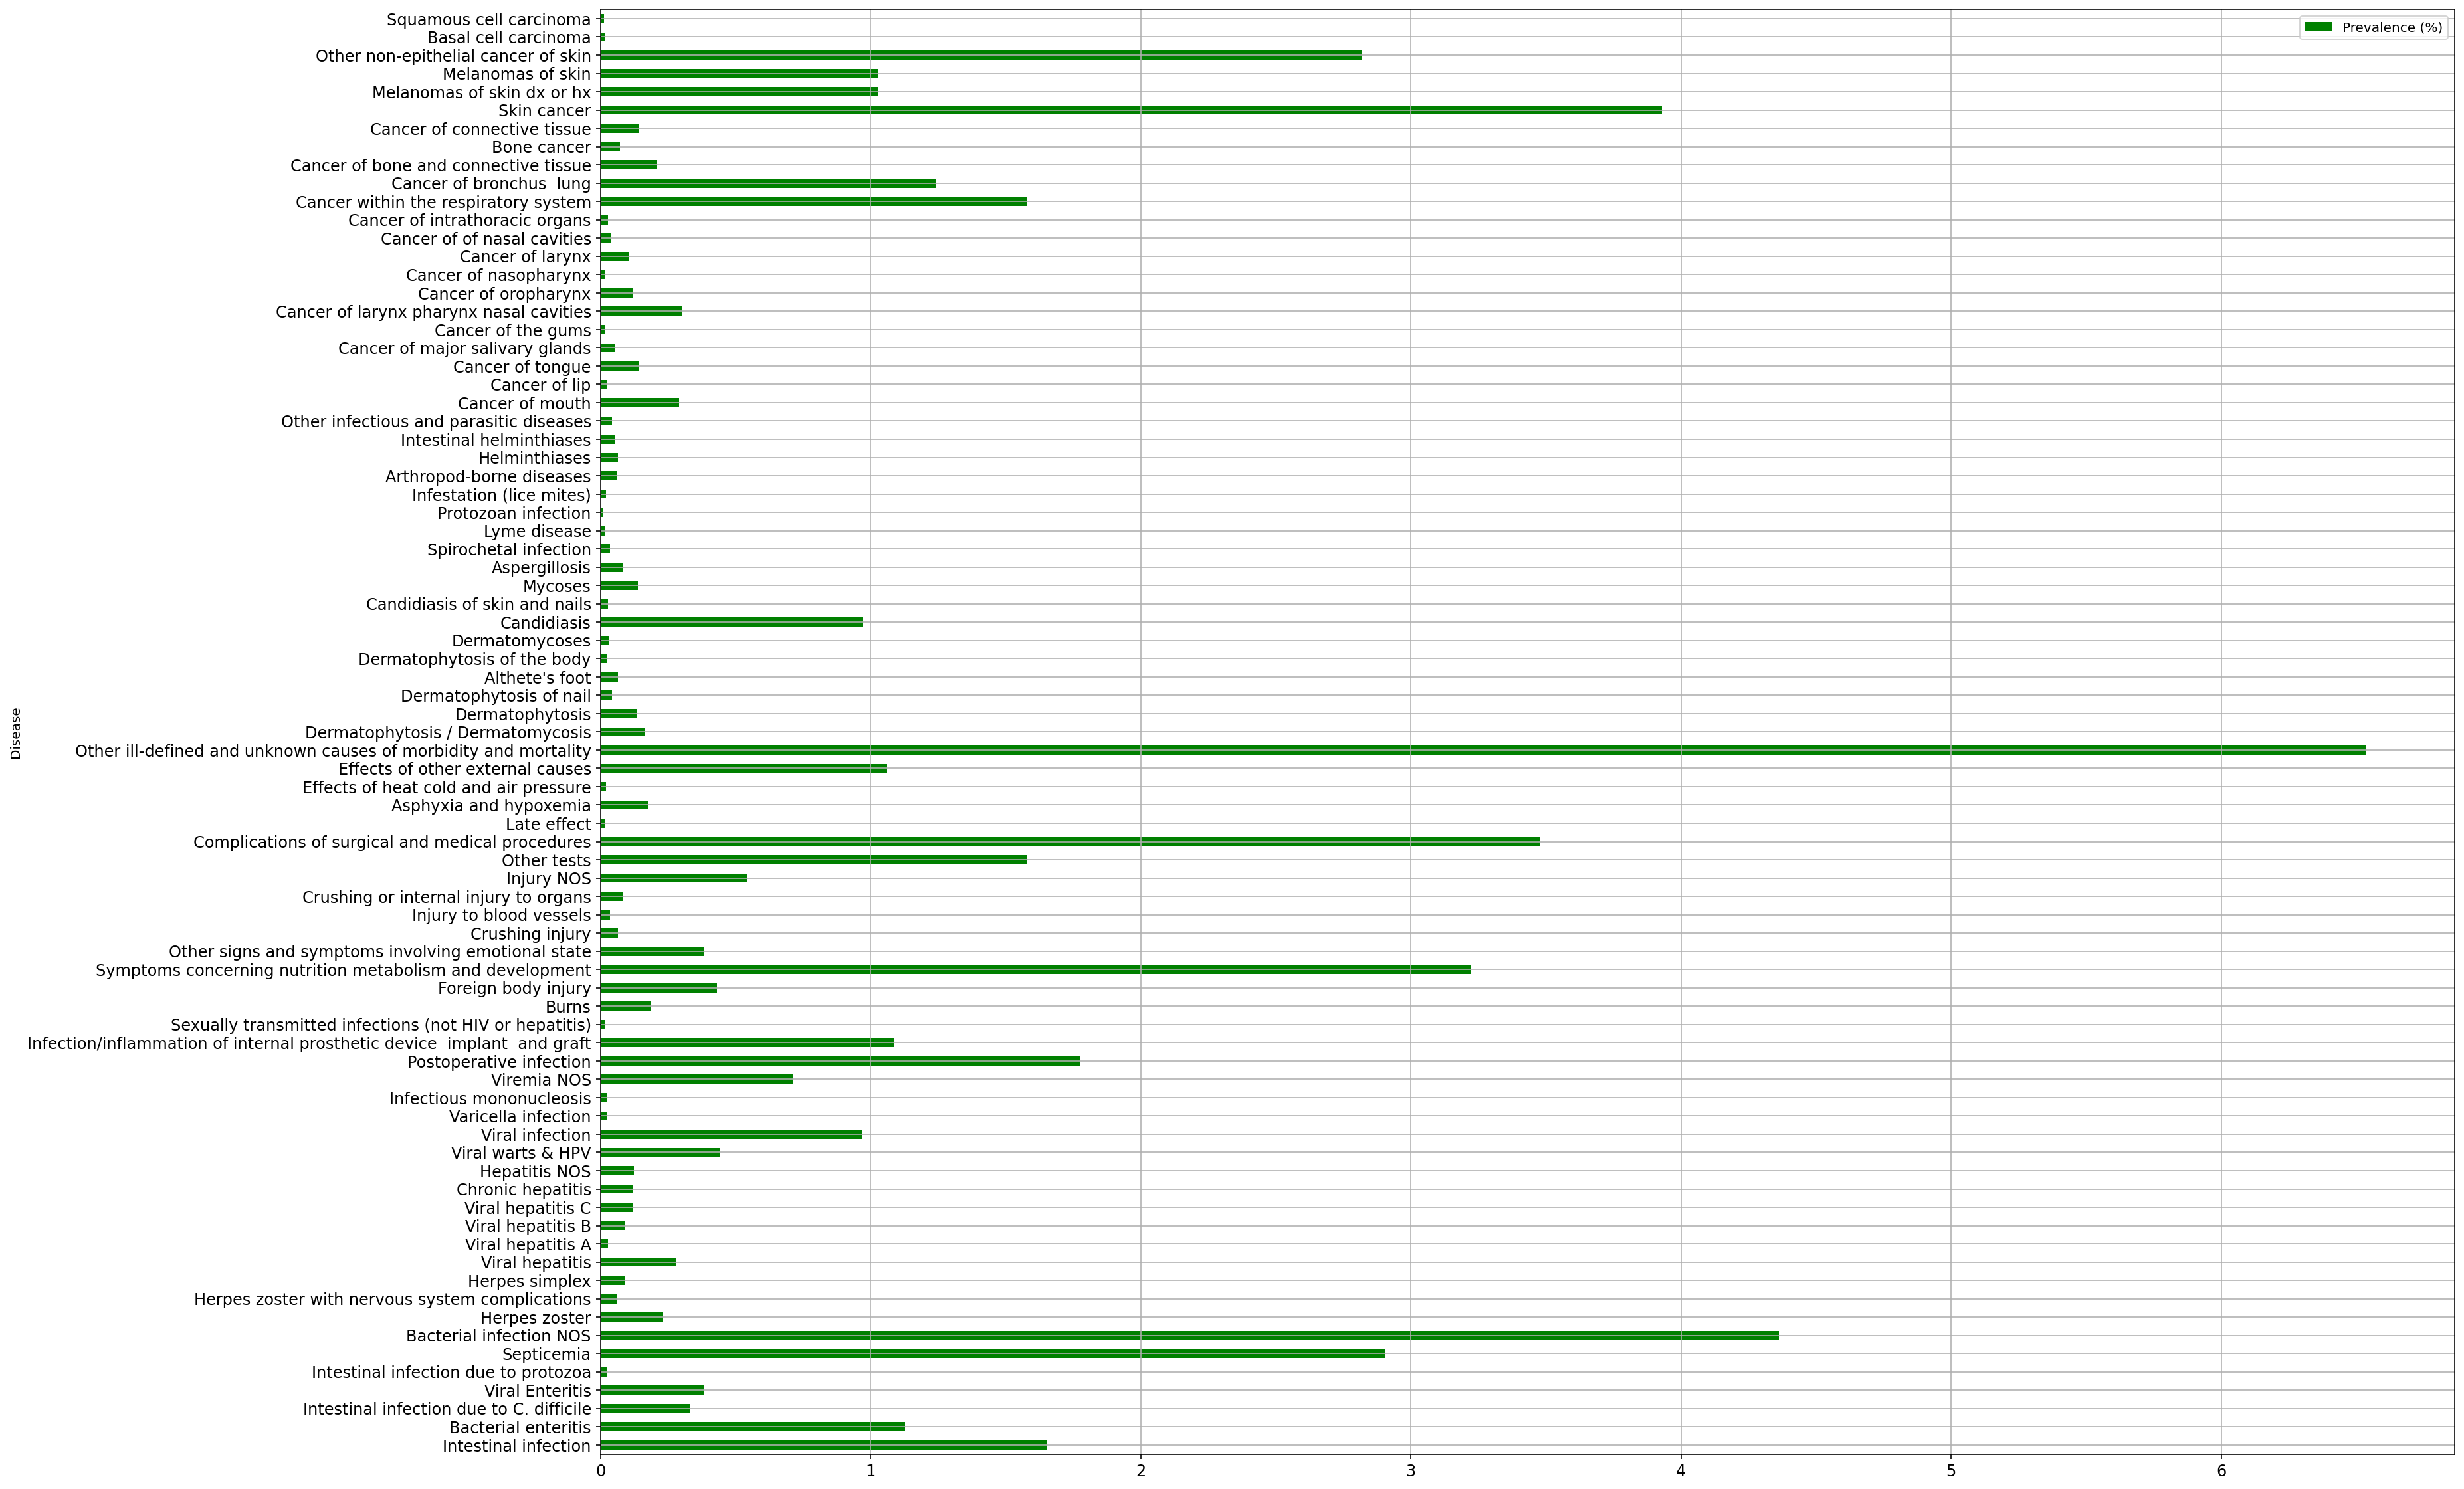

In [105]:
# Save all barplots 

split_data = [data0_78, 
              data79_157, 
              data158_236, 
              data237_315, 
              data316_394,
              data395_473,
              data474_552,
              data553_630,
              data631_708,
              data709_786] 

lowcount = 0
upcount = 78

for item in split_data:
    
    barplot = prev_barplot(item, 'g')
    save_barplot(barplot, 'prevalence_barplots/prev_bar_'+str(lowcount)+'_'+str(upcount))
    lowcount+= 79
    upcount+=79


array([[<AxesSubplot:title={'center':'Prevalence (%)'}>]], dtype=object)

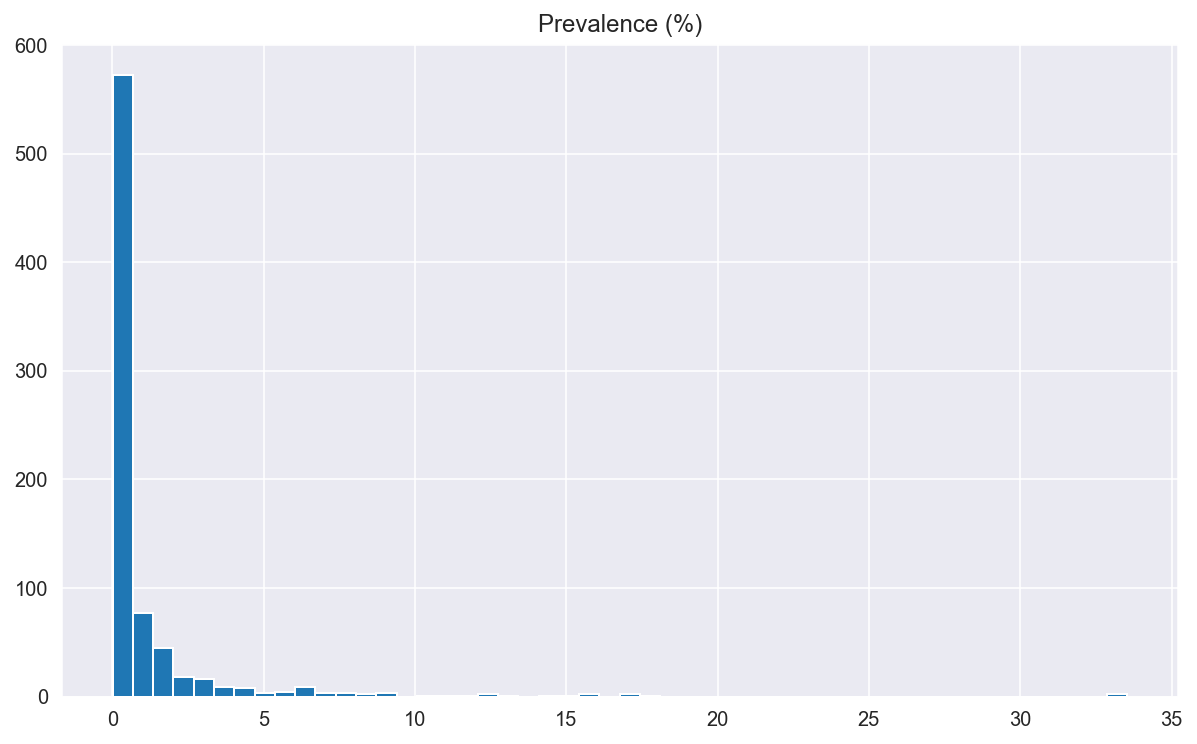

In [243]:
# Histogram to show the distribution of desnisties
data.hist(density=False,
          bins=50)